In [1]:
import numpy as np
import seaborn as sns

import ginsim
import biolqm
import maboss
from itertools import combinations # for iterating over sets
import matplotlib.pyplot as plt # for modifying plots
import pandas as pd # for the visualization of lists of states
import pydot

import os

from tools import load_trajs, draw_graph_from_pandas, compute_circuits, compute_stg_counts

In [7]:
path = "../config/differentiation/boolean_network/"

In [8]:
bnd_file = path + "corral.bnd"
cfg_file = path + "corral_latest_andrea.cfg"

tcell_sim = maboss.load(bnd_file, cfg_file)

In [9]:
biolqm_model = maboss.to_biolqm(tcell_sim)

lrg = biolqm.to_ginsim(biolqm_model)

ginsim.show(lrg)

In [10]:
bnd_file = path + "dendritic_cells.bnd"
cfg_file = path + "dendritic_cells.cfg"

dendritic_cell_sim = maboss.load(bnd_file, cfg_file)

In [11]:
biolqm_model = maboss.to_biolqm(dendritic_cell_sim)

lrg = biolqm.to_ginsim(biolqm_model)

ginsim.show(lrg)

In [12]:
input_tcell = ["IL1_In", "MHCII_b1", "MHCII_b2", "IL12_In", "IL6_In", "CD4", "CD80", "IL23_In"]

In [236]:
Th17 = ["IL12_In", "MHCII_b1", "MHCII_b2", "CD80", "T0", "CD4"]

In [15]:
output_physiboss = ["T0" , "IL12RB1" , "IL12RB2" , "GP130" , "STAT5B_b1" , "IL1RAP" , "IL1R1" , "STAT5B_b2" , "CXCR4", "IL2RB", "CGC"]
output_maboss = ["Treg", "Th17", "Th1"]
nodes_phenotype = ["FOXP3", "FOXP3_2", "RORGt", "Tbet", "CD4"]

<_io.TextIOWrapper name='/tmp/tmpp_eigr9b/tmpsdr5_xjw.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmpp_eigr9b/tmpfk59bv84.cfg' mode='w' encoding='UTF-8'>
/tmp/tmpp_eigr9b
['MaBoSS_128n', '-c', '/tmp/tmpp_eigr9b/tmpfk59bv84.cfg', '-o', '/tmp/tmpp_eigr9b/res', '/tmp/tmpp_eigr9b/tmpsdr5_xjw.bnd']
finish


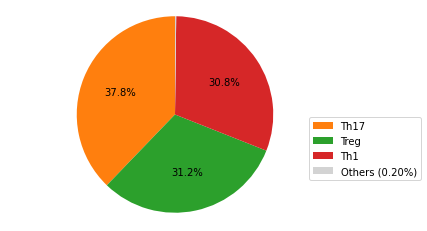

In [17]:
#Wild type Tcell

sim = tcell_sim.copy()
sim.network.set_output(output_maboss)
sim.update_parameters(sample_count=1000,max_time=100, time_tick=0.5)
#maboss.set_nodes_istate(sim, Th17_ON_Nodes, [0, 1])
#maboss.set_nodes_istate(sim, Th17_ON_Nodes, [0, 1])
#maboss.set_nodes_istate(sim, sim.network.keys(), [1, 0])
#maboss.set_nodes_istate(sim, output_physiboss, [0, 1])

#maboss.set_nodes_istate(sim, init_state, [0, 1])

model = sim.run()

model.plot_piechart()

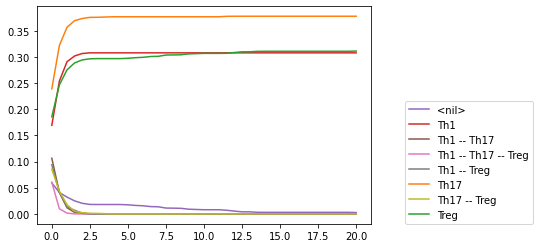

In [20]:
model.plot_trajectory(until=20)

In [21]:
model.get_states_probtraj().iloc[-1,:]

<nil>                  0.002
Th1                    0.308
Th1 -- Th17            0.000
Th1 -- Th17 -- Treg    0.000
Th1 -- Treg            0.000
Th17                   0.378
Th17 -- Treg           0.000
Treg                   0.312
Name: 99.0, dtype: float64

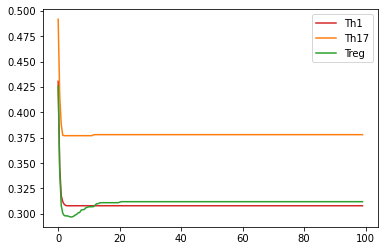

In [22]:
model.plot_node_trajectory()

In [23]:
## Discrete time
WT_phenotypes_discrete = sim.copy()
WT_phenotypes_discrete.update_parameters(discrete_time=1, time_tick=1, max_time=150)


#output = ["Tbet", "FOXP3", "RORGt"]

#WT_phenotypes_discrete.network.set_output(output)

In [24]:
%time res_discrete = WT_phenotypes_discrete.run()

<_io.TextIOWrapper name='/tmp/tmpsrcs7h2m/tmpoeu_mekq.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmpsrcs7h2m/tmpg8wwd38o.cfg' mode='w' encoding='UTF-8'>
/tmp/tmpsrcs7h2m
['MaBoSS_128n', '-c', '/tmp/tmpsrcs7h2m/tmpg8wwd38o.cfg', '-o', '/tmp/tmpsrcs7h2m/res', '/tmp/tmpsrcs7h2m/tmpoeu_mekq.bnd']
finish
CPU times: user 4.46 ms, sys: 4.41 ms, total: 8.87 ms
Wall time: 421 ms


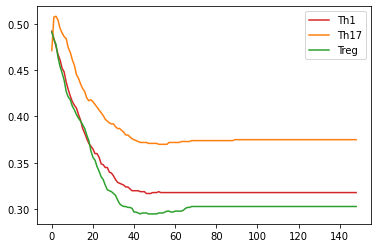

In [25]:
res_discrete.plot_node_trajectory()

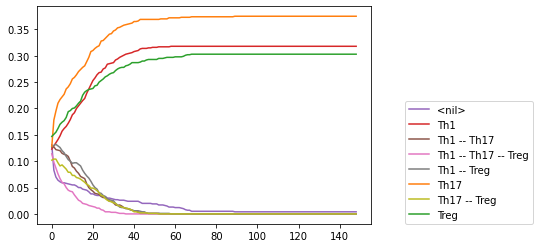

In [26]:
res_discrete.plot_trajectory()

In [27]:
WT_phenotypes_trajs = sim.copy()
WT_phenotypes_trajs.update_parameters(display_traj=1, thread_count=1)

In [28]:
%time res_trajs = WT_phenotypes_trajs.run()

<_io.TextIOWrapper name='/tmp/tmp89lsi1k6/tmpzhi3g31t.bnd' mode='w' encoding='UTF-8'>
<_io.TextIOWrapper name='/tmp/tmp89lsi1k6/tmp7mrhva7o.cfg' mode='w' encoding='UTF-8'>
/tmp/tmp89lsi1k6
['MaBoSS_128n', '-c', '/tmp/tmp89lsi1k6/tmp7mrhva7o.cfg', '-o', '/tmp/tmp89lsi1k6/res', '/tmp/tmp89lsi1k6/tmpzhi3g31t.bnd']
finish
CPU times: user 2.08 ms, sys: 6.37 ms, total: 8.44 ms
Wall time: 563 ms


In [32]:
outputs_phenotype = ["Treg", "Th17", "Th1"]
trajs, all_states = load_trajs(res_trajs._path, outputs_phenotype, )
stg_counts, state_ids, ids_state = compute_stg_counts(trajs, all_states)

In [33]:
data = pd.DataFrame(
    data=stg_counts,
    index=state_ids.keys(), columns=state_ids.keys()
)
data

,<nil>,Th1,Th1 -- Th17,Th1 -- Th17 -- Treg,Th1 -- Treg,Th17,Th17 -- Treg,Treg
<nil>,0.0,27.0,0.0,0.0,0.0,82.0,0.0,17.0
Th1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Th1 -- Th17,0.0,67.0,0.0,0.0,0.0,70.0,0.0,0.0
Th1 -- Th17 -- Treg,0.0,0.0,37.0,0.0,37.0,0.0,40.0,0.0
Th1 -- Treg,0.0,79.0,0.0,0.0,0.0,0.0,0.0,88.0
Th17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Th17 -- Treg,0.0,0.0,0.0,0.0,0.0,87.0,0.0,88.0
Treg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


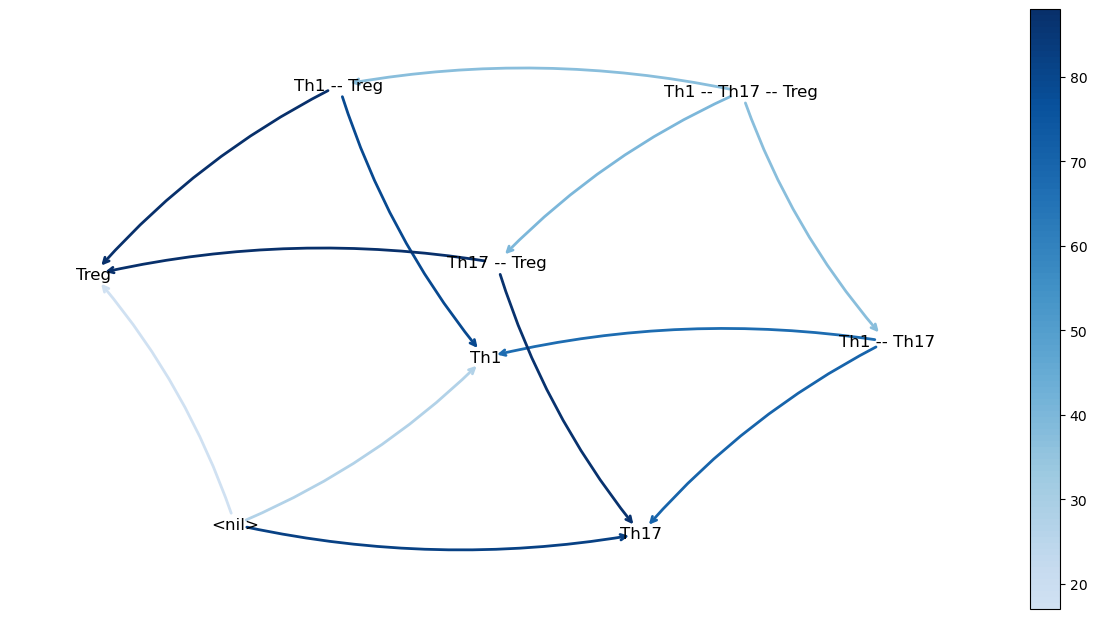

In [34]:
draw_graph_from_pandas(data)

In [35]:
probas = pd.DataFrame(
    data=np.divide(stg_counts,stg_counts.sum(axis=1)[:, np.newaxis]), 
    index=state_ids.keys(), columns=state_ids.keys()
)
probas

/tmp/ipykernel_51078/4157950200.py:2: RuntimeWarning: invalid value encountered in true_divide
  data=np.divide(stg_counts,stg_counts.sum(axis=1)[:, np.newaxis]),


,<nil>,Th1,Th1 -- Th17,Th1 -- Th17 -- Treg,Th1 -- Treg,Th17,Th17 -- Treg,Treg
<nil>,0.0,0.214286,0.000000,0.0,0.000000,0.650794,0.000000,0.134921
Th1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Th1 -- Th17,0.0,0.489051,0.000000,0.0,0.000000,0.510949,0.000000,0.000000
Th1 -- Th17 -- Treg,0.0,0.000000,0.324561,0.0,0.324561,0.000000,0.350877,0.000000
Th1 -- Treg,0.0,0.473054,0.000000,0.0,0.000000,0.000000,0.000000,0.526946
Th17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Th17 -- Treg,0.0,0.000000,0.000000,0.0,0.000000,0.497143,0.000000,0.502857
Treg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
